In [1]:
import time

import matplotlib.pyplot as plt
import skeliner as sk



In [2]:
def plot_skeleton(skel, mesh, name):
    # --- 0. one global bounding-box ----------------------------------------
    v = mesh.vertices * 1e-3                      # nm → µm once
    gx = (v[:, 0].min(), v[:, 0].max())   # x (for XZ)
    gy = (v[:, 1].min(), v[:, 1].max())   # y (for XY, YZ)
    gz = (v[:, 2].min(), v[:, 2].max())   # z (for YZ, XZ)


    # --- 1. build the 2×2 mosaic ------------------------------------------

    mosaic = """
    B.
    AC
    """
    fig, ax = plt.subplot_mosaic(
        mosaic,
        figsize=(8, 8),
        gridspec_kw={
            "height_ratios": [gx[1]-gx[0], gz[1]-gz[0]],   # row-heights in µm
            "width_ratios":  [gy[1]-gy[0], gx[1]-gx[0]],   # col-widths  in µm
        },
    )

    # make every panel square in data-pixel space
    sk.plot2d(skel, mesh, plane="yx", scale=1e-3,
            ax=ax["B"], xlim=gy, ylim=gx,
            draw_edges=True, draw_soma_mask=True)
    ax["B"].set_aspect("equal")           # <── let XY stretch

    sk.plot2d(skel, mesh, plane="yz", scale=1e-3,
            ax=ax["A"], xlim=gy, ylim=gz,
            draw_edges=True, draw_soma_mask=True)
    ax["A"].set_aspect("equal")           # <── full Δy × Δz rectangle

    sk.plot2d(skel, mesh, plane="xz", scale=1e-3,
            ax=ax["C"], xlim=gx, ylim=gz,
            draw_edges=True, draw_soma_mask=True)
    ax["C"].set_aspect("equal")           # <── full Δx × Δz rectangle

    fig.suptitle(f"Eyewire {name}", fontsize=16)

In [3]:
# EyeWire I dataset in .ctm format can be found at: 
# https://drive.google.com/file/d/1-qmE1sEL3AIGpNfi0w50MEOgm2WIF4_1/view?usp=sharing
mesh_path = "../data/eyewire/10005.ctm"
mesh = sk.io.load_mesh(mesh_path)

In [4]:
start = time.time()
skel_pre_auto = sk.skeletonize(mesh, 
    detect_soma="pre", # pre-skeletonization soma detection
    soma_seed_radius_multipler=30,
    soma_density_cutoff=0.3,
    soma_dilation_steps=1,
    collapse_soma=True, # default
    bridge_gaps=True, # default
    prune_tiny_neurites=True, # default
    verbose=True,
)

[skeliner] starting skeletonisation
 ↳  build surface graph                          … 1.7 s
 ↳  detect soma                                  … 1.1 s
 ↳  bin surface vertices by geodesic distance    … 0.8 s
 ↳  compute bin centroids and radii              … 3.0 s
 ↳  map mesh faces to skeleton edges             … 0.4 s
 ↳  merge redundant near-soma nodes              … 0.0 s
 ↳  bridge skeleton gaps                         … 0.4 s
 ↳  build global minimum-spanning tree           … 0.1 s
 ↳  prune tiny soma-attached branches            … 0.0 s
TOTAL (soma + core + post)                       … 7.4 s (2.7 + 4.2 + 0.4)


In [5]:
start = time.time()
skel_post_auto = sk.skeletonize(mesh, 
    detect_soma="post", # post skeletonization soma detection
    collapse_soma=True, # default
    bridge_gaps=True, # default
    prune_tiny_neurites=True, # default
    verbose=True,
)


[skeliner] starting skeletonisation
 ↳  build surface graph                          … 1.0 s
 ↳  bin surface vertices by geodesic distance    … 0.8 s
 ↳  compute bin centroids and radii              … 1.9 s
 ↳  map mesh faces to skeleton edges             … 0.2 s
 ↳  merge redundant near-soma nodes              … 0.0 s
 ↳  bridge skeleton gaps                         … 0.7 s
 ↳  build global minimum-spanning tree           … 0.1 s
 ↳  prune tiny soma-attached branches            … 0.0 s
TOTAL (soma + core + post)                       … 4.8 s (0.0 + 4.0 + 0.7)


In [6]:
start = time.time()
skel_pre_seed = sk.skeletonize(mesh, 
    detect_soma="seed", # seed-based soma detection (manual)
    soma_seed_point=skel_post_auto.nodes[0],
    soma_seed_radius=skel_post_auto.r[0] * 1.1,
    collapse_soma=True, # default
    bridge_gaps=True, # default
    prune_tiny_neurites=True, # default
    verbose=True,
)

[skeliner] starting skeletonisation
 ↳  build surface graph                          … 1.3 s
 ↳  detect soma                                  … 0.4 s
 ↳  bin surface vertices by geodesic distance    … 0.9 s
 ↳  compute bin centroids and radii              … 3.0 s
 ↳  map mesh faces to skeleton edges             … 0.3 s
 ↳  merge redundant near-soma nodes              … 0.0 s
 ↳  bridge skeleton gaps                         … 0.9 s
 ↳  build global minimum-spanning tree           … 0.1 s
 ↳  prune tiny soma-attached branches            … 0.1 s
TOTAL (soma + core + post)                       … 7.1 s (1.7 + 4.3 + 1.0)


In [7]:
start = time.time()
skel_pre_semiauto = sk.skeletonize(mesh, 
    detect_soma="pre", 
    soma_seed_point=skel_post_auto.nodes[0],
    soma_seed_radius=skel_post_auto.r[0] * 1.1,
    soma_seed_radius_multipler=30,
    soma_density_cutoff=0.3,
    soma_dilation_steps=0,
    collapse_soma=True, # default
    bridge_gaps=True, # default
    prune_tiny_neurites=True, # default
    verbose=True,
)

[skeliner] starting skeletonisation
 ↳  build surface graph                          … 1.1 s
 ↳  detect soma                                  … 2.4 s
 ↳  bin surface vertices by geodesic distance    … 0.7 s
 ↳  compute bin centroids and radii              … 2.9 s
 ↳  map mesh faces to skeleton edges             … 0.4 s
 ↳  merge redundant near-soma nodes              … 0.0 s
 ↳  bridge skeleton gaps                         … 0.3 s
 ↳  build global minimum-spanning tree           … 0.1 s
 ↳  prune tiny soma-attached branches            … 0.1 s
TOTAL (soma + core + post)                       … 7.9 s (3.4 + 4.1 + 0.4)


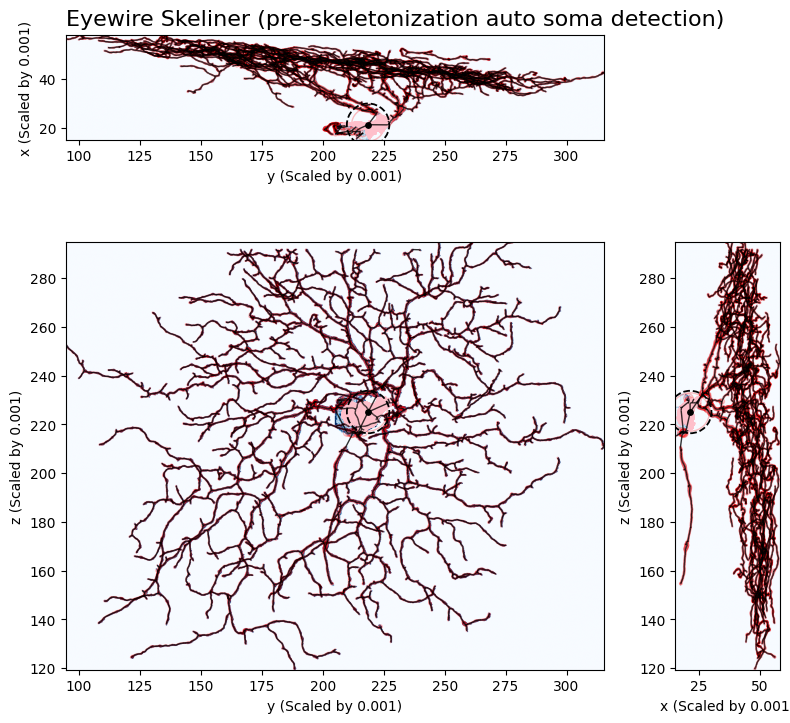

In [8]:
plot_skeleton(skel_pre_auto, mesh, "Skeliner (pre-skeletonization auto soma detection)")


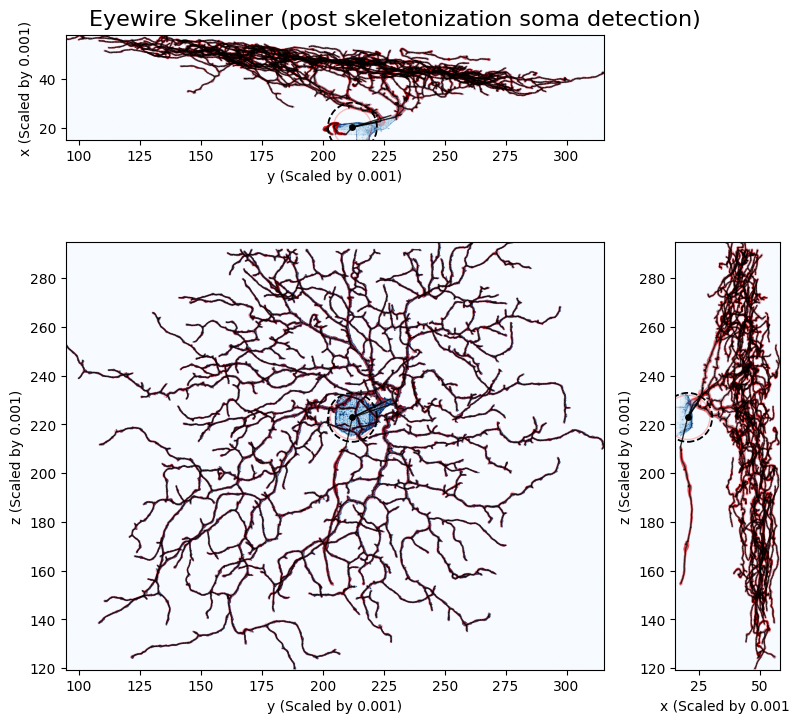

In [9]:
plot_skeleton(skel_post_auto, mesh, "Skeliner (post skeletonization soma detection)")


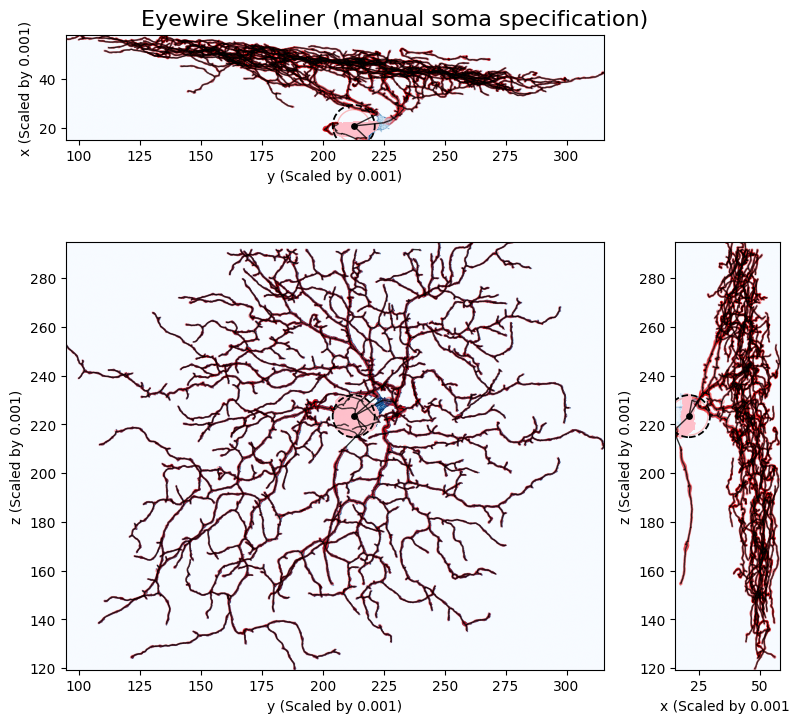

In [10]:
plot_skeleton(skel_pre_seed, mesh, "Skeliner (manual soma specification)")


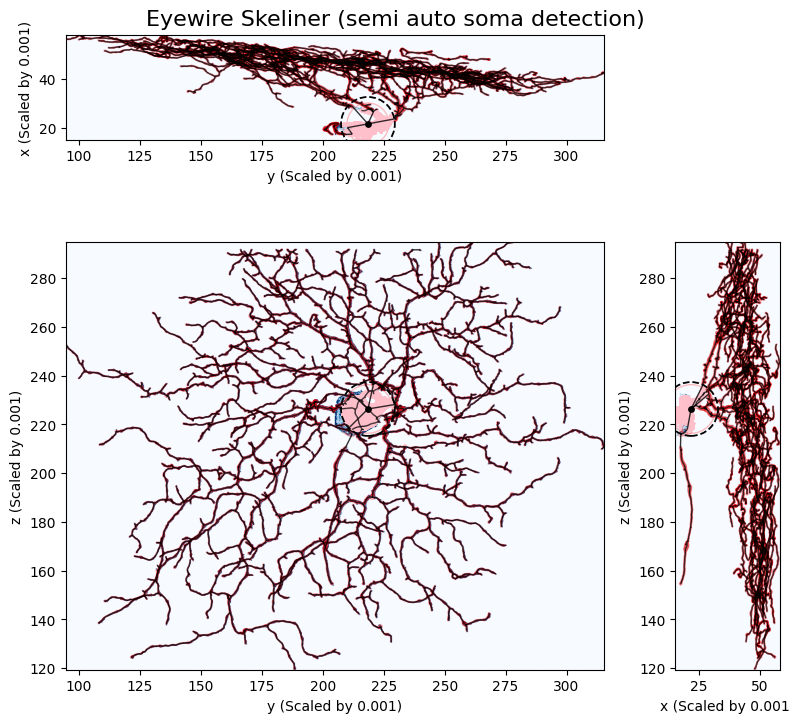

In [11]:
plot_skeleton(skel_pre_semiauto, mesh, "Skeliner (semi auto soma detection)")


In [12]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-05-20 23:15:52CEST

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 9.2.0

matplotlib: 3.10.3
skeliner  : 0.1.0

Watermark: 2.5.0

